#### K Nearest Neighbour Classification
- Figure out the value of K using trial and error.
- find K nearest point to the input by euclidian distance.

    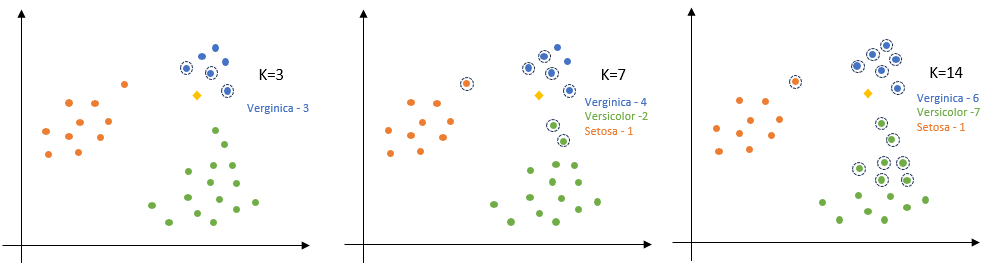

- rule is that you find most nearby K datamoints and take the maximum count
- case 1 - (K=3)point belong to verginica(this works fine)
- case 2 - (K=7)take the highest number point belong to verginica(this also works fine)
- case 3 - (K=14)here is a problem becoz total number of datapoints in verginica class are very less(this is wrong prediction)
- Thus, you have to carefully choose the value of K (not very small or not very high)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

# 0 -> setosa 
# 1 -> versicolor
# 2 -> virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris_df["flower_name"] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df0 = iris_df[iris_df.target == 0] # setosa df
df1 = iris_df[iris_df.target == 1] # versicolor df
df2 = iris_df[iris_df.target == 2] # virginica df

**Sepal length vs Sepal Width(Setosa vs Versicolor)**

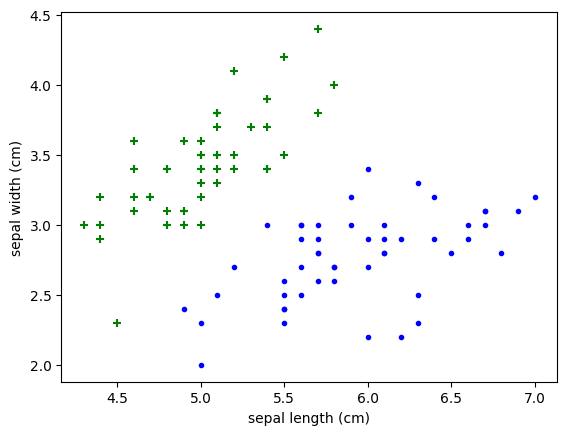

In [8]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker=".")

**Petal length vs Petal Width(Setosa vs Versicolor)**

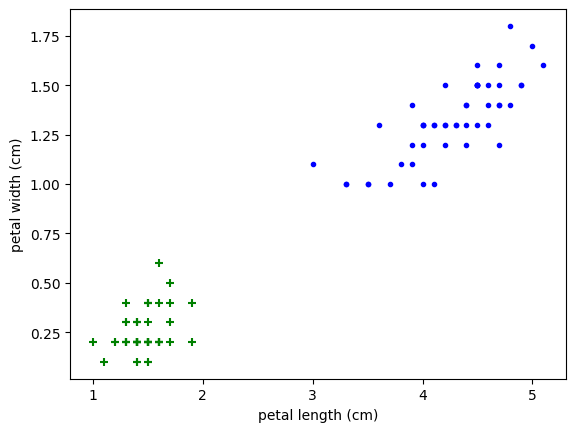

In [9]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker=".")

**Train Test Split**

In [10]:
from sklearn.model_selection import train_test_split

X = iris_df.drop(["target", "flower_name"], axis="columns")
Y = iris_df.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

**Create KNN(K Nearest Neighbour) classifier**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.score(X_test,Y_test)

0.9333333333333333

you can you GridSearchCV or K-Fold Cross Validation to find the optimal value for K(n_neighbours)